In [1]:
import pandas as pd

df_sampling = pd.read_csv('C:\\Users\\lucia\\Desktop\\DielModels\\reconstruction_results\\MODEL1507180028\\results_troppo\\DielModel\\dfa\\diel_model_sampling.csv')

In [2]:
df_kstest_reactions = pd.read_csv('C:\\Users\\lucia\\Desktop\\DielModels\\reconstruction_results\\MODEL1507180028\\results_troppo\\DielModel\\dfa\\diel_model_DFA_reaction_result.csv')

reactions_differential_expressed = df_kstest_reactions['Reaction'].tolist()

In [3]:
colunas_desejadas = [coluna for coluna in df_sampling.columns if any(reacao in coluna for reacao in reactions_differential_expressed)]
df_filtrado = df_sampling[colunas_desejadas]

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [5]:
reactions_data = df_filtrado.iloc[:, 1:].values

In [6]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(reactions_data)

tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(reactions_data)

In [7]:
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
tsne_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])

In [8]:
df_filtrado_transposto = df_filtrado.T

In [13]:
df_filtrado_transposto

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
Bc30_Day,0.020757,0.015187,0.015222,0.011006,0.008390,0.007735,0.007614,0.007790,0.007511,0.007376,...,0.007541,0.007131,0.007523,0.007866,0.007752,0.007582,0.007380,0.007148,0.007613,0.007878
Ex1_Day,25.348963,16.889212,17.106598,11.355028,10.945719,11.043553,10.728181,11.290309,11.417125,10.869943,...,2.849747,2.175502,2.954494,3.313664,2.789962,0.728092,1.087050,0.866712,0.695322,1.119793
Ex2_Day,535.396990,495.934624,497.202209,477.690875,520.894319,529.276092,534.859626,536.996082,543.276250,545.507650,...,791.306808,785.777047,798.674249,838.495844,825.293592,825.977657,823.517882,843.837754,842.143725,837.115057
Ex3_Day,999.999876,999.999898,999.999897,999.999868,999.650883,999.641486,999.636223,999.642353,999.641885,999.643100,...,960.545803,960.651340,960.732750,960.342323,960.545141,962.615161,962.576197,962.257155,963.387676,963.396758
Ex4_Day,999.999835,999.999864,999.999863,999.999824,999.299990,999.289404,999.281975,999.291177,999.290462,999.292389,...,983.247207,983.332476,983.398161,982.917376,983.080841,985.434008,985.402645,985.146007,986.295379,986.302618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R01415_c_Night_reverse,0.078333,1.921976,2.081753,2.916972,7.656752,12.454130,12.289844,12.148991,15.127787,26.507859,...,385.501157,388.779866,401.008390,382.780692,385.085338,384.863439,387.838482,383.133296,385.018445,378.998522
R01876_c_Night_reverse,4.910064,7.286718,4.121350,31.089462,47.256187,61.137615,62.179509,61.991316,64.706374,77.444729,...,576.718228,579.701516,574.598244,553.114978,563.175639,569.740952,572.633358,554.067177,553.246230,525.421208
R02296_c_Night_reverse,0.043280,1.874551,1.408069,2.093409,5.034098,7.241810,7.416842,6.626039,8.548848,19.705213,...,192.544411,195.226149,206.141375,195.135759,195.995233,196.138493,198.027319,189.928083,193.069034,183.834706
R02484_c_Night_reverse,0.043252,1.874528,1.408047,2.093381,5.034085,7.241799,7.416794,6.626051,8.548833,19.705203,...,187.554778,190.194967,201.078259,190.225698,191.005890,191.147207,193.051221,185.076142,188.054656,178.816890


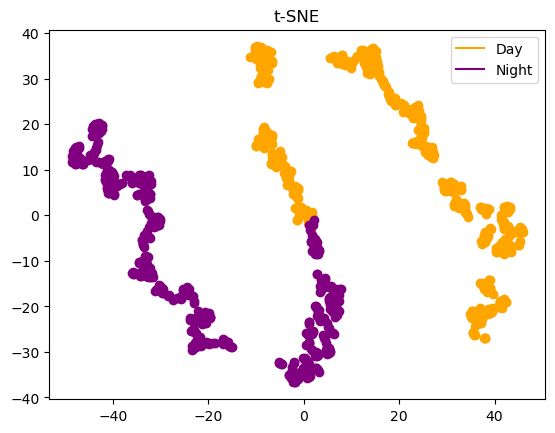

<Figure size 640x480 with 0 Axes>

In [11]:
labels = ['Day' if 'Day' in rxn else 'Night' for rxn in df_filtrado_transposto.index]

color_map = {'Day': 'orange', 'Night': 'purple'}

for i, row in tsne_df.iterrows():
    category = labels[i]
    color = color_map[category]
    plt.scatter(row['t-SNE1'], row['t-SNE2'], color=color)

plt.legend(handles=[plt.Line2D([], [], color='orange', label='Day'),
                    plt.Line2D([], [], color='purple', label='Night')])

plt.title('t-SNE')
plt.show()
plt.savefig('C:\\Users\\lucia\\Desktop\\DielModels\\PCA + T-SNE\\gráfico_t-sne_df_filtrado.png')

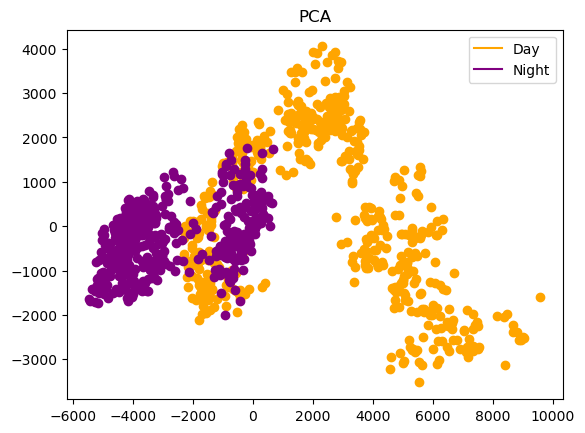

<Figure size 640x480 with 0 Axes>

In [12]:
color_map = {'Day': 'orange', 'Night': 'purple'}

for i, row in pca_df.iterrows():
    category = labels[i]
    color = color_map[category]
    plt.scatter(row['PC1'], row['PC2'], color=color)

plt.legend(handles=[plt.Line2D([], [], color='orange', label='Day'),
                    plt.Line2D([], [], color='purple', label='Night')])

plt.title('PCA')
plt.show()
plt.savefig('C:\\Users\\lucia\\Desktop\\DielModels\\PCA + T-SNE\\gráfico_pca_df_filtrado.png')